# Clustering

At first we need to import a few relevant frameworks to cluster trips from the given data.

pandas will be implemented to organize and manipulate data in a dataFrame.

matplotlib and seaborn will be implemented to display the data. sklearn is a machine learning framework:

StandardScaler will be implemented to set data to the same scale.

KMeans will be implemented to cluster data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In the second step, the data is loaded into dataframes to perform operations on them in the further process. "rentals.csv" contains the rental activities. In "weather.csv" the hourly weather data for Philadelphia are contained. Since it is important in the further course not to encounter errors, the days of the week and months must be represented in the form of integer-values.
At the end there is the output which confirms that the added columns are present.

In [2]:
#load datasets
rental_trips_df= pd.read_csv('data_prepared/rentals.csv')
weather_df=pd.read_csv('data_prepared/weather.csv')

rental_trips_df['start_time'] =pd.to_datetime(rental_trips_df['start_time'])
rental_trips_df['month'] = rental_trips_df['start_time'].dt.month
rental_trips_df['weekday'] = rental_trips_df['start_time'].dt.dayofweek

weather_df['date_time'] =pd.to_datetime(weather_df['date_time'])
weather_df.set_index('date_time')

rental_trips_df.head(2)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,trip_length,is_roundtrip,start_time_hourly,hour,weekday,weekday_name,month,month_name,season,is_weekend,is_holiday,is_subscription,dist,kmh
0,2018-01-01 00:24:00,2018-01-01 00:42:00,3124,3073,3708,Indego30,18,False,2018-01-01 00:00:00,0,0,Monday,1,January,Winter,False,True,True,1.396371,4.654571
1,2018-01-01 00:38:00,2018-01-01 10:10:00,3023,3066,3288,Indego365,572,False,2018-01-01 00:00:00,0,0,Monday,1,January,Winter,False,True,True,0.384103,0.040291


In [3]:
rental_trips_df_2 = rental_trips_df.copy()
rental_trips_data = rental_trips_df_2[['month', 'weekday', 'hour', 'user_type', 'trip_length']]
rental_trips_data.head()

,month,weekday,hour,user_type,trip_length
0,1,0,0,Indego30,18
1,1,0,0,Indego365,572
2,1,0,0,Indego30,22
3,1,0,1,Indego30,21
4,1,0,1,Indego30,4


In [4]:
weather_df.head()

,date_time,precip,temp
0,2018-01-01 00:00:00,0.0,-10.6
1,2018-01-01 01:00:00,0.0,-10.6
2,2018-01-01 02:00:00,0.0,-11.1
3,2018-01-01 03:00:00,0.0,-12.2
4,2018-01-01 04:00:00,0.0,-11.7


In the following, the time and the user_types are normalized so that the values can be calculated. The 0 was set for the user group that has the Indego30 contract. Customers with an Indego365 subscription were assigned to 1. IndegoFlex customers are assigned to 2, Walk-Up 3 and customers with a daily changing need to use the bikes are assigned to 4.

The unification of the time, by interpreting them into a circular shape, serves to have a continuous continuum, as it is in reality. Theoretically, one jumps from 23:59 to 00:00, but this can lead to distortions, whereas continuous equal intervals lead to added value in the data agreement.

C:\Users\wayne\AppData\Local\Temp\ipykernel_7360\4165225166.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_trips_data[col_name + '_sin'] = np.sin(rental_trips_data[col_name]*(2.*np.pi/24))
C:\Users\wayne\AppData\Local\Temp\ipykernel_7360\4165225166.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_trips_data[col_name + '_cos'] = np.cos(rental_trips_data[col_name]*(2.*np.pi/24))


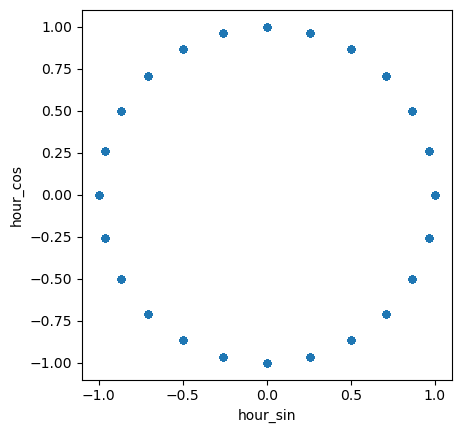

In [5]:
#Transforming user_types into numberic values
user_types = {'Indego30': 0, 'Indego365': 1, 'IndegoFlex': 2, 'Walk-up': 3, 'Day Pass': 4}

#Looping through the dictionary and transforming user_type
for key, value in user_types.items():
    rental_trips_data.loc[rental_trips_data['user_type'] == key,'user_type'] = value

#Function to transform the time into sin/cos
def convert_time(data, col_name):
    rental_trips_data[col_name + '_sin'] = np.sin(rental_trips_data[col_name]*(2.*np.pi/24))
    rental_trips_data[col_name + '_cos'] = np.cos(rental_trips_data[col_name]*(2.*np.pi/24))

#Converting by using the function
convert_time(rental_trips_data, 'hour')

#Creating a Scatter plot
rental_trips_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')



In [6]:
def scale_rental_trips_data(rental_trips_data, columns_to_drop):
    #Initializing scaler   
    scaler = StandardScaler()
    scaler.fit(rental_trips_data)
    #scaling data
    data_scaled = scaler.transform(rental_trips_data)
    #convertin scaled data to the dataframe
    data_scaled_df = pd.DataFrame(data_scaled, columns=rental_trips_data.columns, index=rental_trips_data.index)
    #dropping columns
    for column in columns_to_drop:
        data_scaled_df = data_scaled_df.drop([column], axis=1)

    return data_scaled_df

columns_to_drop = ['hour']
#sclaing rental_trips and storing it in a new dataframe
rental_trips_data_scaled = scale_rental_trips_data(rental_trips_data, columns_to_drop)


In [7]:
rental_trips_data_scaled.head()

,month,weekday,user_type,trip_length,hour_sin,hour_cos
0,-2.000679,-1.460252,-0.515006,-0.040773,0.333907,2.348044
1,-2.000679,-1.460252,0.235390,6.878013,0.333907,2.348044
2,-2.000679,-1.460252,-0.515006,0.009182,0.333907,2.348044
3,-2.000679,-1.460252,-0.515006,-0.003306,0.688352,2.286968
4,-2.000679,-1.460252,-0.515006,-0.215616,0.688352,2.286968


Now we need to merge the weather data with the rental trip data.




In [8]:
rental_trips_2_df=rental_trips_df.copy()
rental_trips_2_df['start_time'] = pd.to_datetime(rental_trips_2_df['start_time'])
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])
rental_trips_2_df['start_date']=rental_trips_2_df['start_time']
rental_trips_2_df.set_index('start_date',inplace =True)
rental_trips_2_df.index=pd.to_datetime(rental_trips_2_df.index)


Creating a new column demand_hourly for further purposes.



In [9]:
rental_trips_group= rental_trips_2_df.groupby(pd.Grouper(key='start_time',freq='H')).count()
hourly_demand=rental_trips_group['end_time']

After merging trips and weather now we improve the dataset.


In [10]:
grouped_df=weather_df
grouped_df.index = pd.to_datetime(grouped_df['date_time'])
grouped_df["hourly_demand"]=hourly_demand
grouped_df["hour"]=grouped_df.index.hour
grouped_df["weekday"]=grouped_df.index.weekday
grouped_df['is_workday']=grouped_df['weekday'].apply(lambda x:1 if x<5 else 0)
grouped_df["month"]=grouped_df.index.month
grouped_df['quarter']= grouped_df['month'].apply(lambda x:x//4)

grouped_df['month_sin'] = np.sin((grouped_df.month-1)*(2.*np.pi/12))
grouped_df['month_cos'] = np.cos((grouped_df.month-1)*(2.*np.pi/12))
grouped_df['hour_sin'] = np.sin(grouped_df.hour*(2.*np.pi/24))
grouped_df['hour_cos'] = np.cos(grouped_df.hour*(2.*np.pi/24))


grouped_df=grouped_df.drop(['date_time'],axis=1)

grouped_df.head()


,precip,temp,hourly_demand,hour,weekday,is_workday,month,quarter,month_sin,month_cos,hour_sin,hour_cos
date_time,,,,,,,,,,,,
2018-01-01 00:00:00,0.0,-10.6,3,0,0,1,1,0,0.0,1.0,0.000000,1.000000
2018-01-01 01:00:00,0.0,-10.6,5,1,0,1,1,0,0.0,1.0,0.258819,0.965926
2018-01-01 02:00:00,0.0,-11.1,8,2,0,1,1,0,0.0,1.0,0.500000,0.866025
2018-01-01 03:00:00,0.0,-12.2,2,3,0,1,1,0,0.0,1.0,0.707107,0.707107
2018-01-01 04:00:00,0.0,-11.7,1,4,0,1,1,0,0.0,1.0,0.866025,0.500000


Creating a scatter to visualize workday/weekend and demand/temperature.
What can be seen at this point is that there seems to be a dependence: the warmer it gets, the higher the demand. This demand also seems to have a constant percentage dependence, so that the demand function for is_Workday has a similar slope as for is_Weekend.  

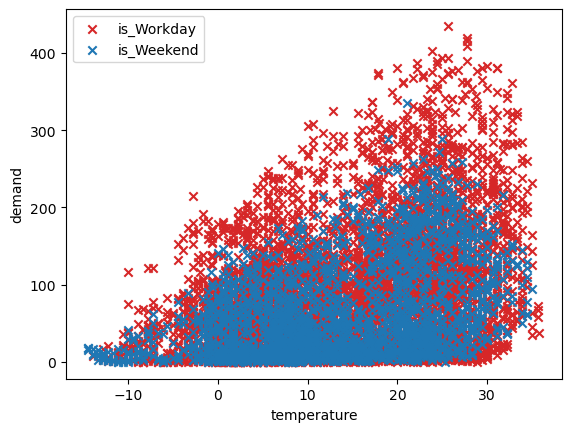

In [11]:
plt.scatter(grouped_df[grouped_df["is_workday"] == 1]["temp"], 
            grouped_df[grouped_df["is_workday"] == 1]["hourly_demand"], marker='x', color='C3')
plt.scatter(grouped_df[grouped_df["is_workday"] == 0]["temp"], 
            grouped_df[grouped_df["is_workday"] == 0]["hourly_demand"], marker='x', color='C0')
plt.ylabel("demand")
plt.xlabel("temperature")
plt.legend(["is_Workday", "is_Weekend"])
plt.show()

# Clustering trips


After preparing the data and getting a first look into the visualation of workday/weekday and the temperature of the dataset. In this section the rental_trips will be clustered and evaluated.
In early days we tried also to set the max_clusters-variable on a higher number (25 & 50) but we realized, that it will take too long to execute it every time. And 15 is also a valid number to show it. The Cluster will be also much smaller than 15.

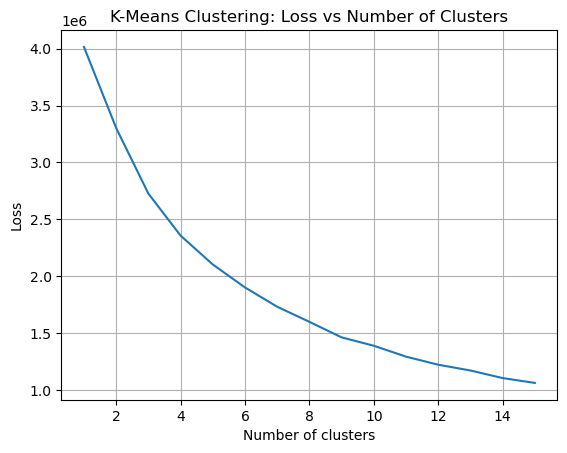

In [12]:

max_clusters = 15

clusters_range = []
loss_values = []


for num_clusters in range(1, max_clusters + 1):
    k_means_model = KMeans(n_clusters = num_clusters)
    k_means_model.fit(rental_trips_data_scaled)
    
    clusters_range.append(num_clusters)
    loss_values.append(k_means_model.inertia_)
    

plt.plot(clusters_range, loss_values)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.title("K-Means Clustering: Loss vs Number of Clusters")
plt.grid(True)
plt.show()

To make a better decision, the graph was zoomed in to 2-10 clusters, since we could already exclude upper and lower values due to too high losses or too much detail.

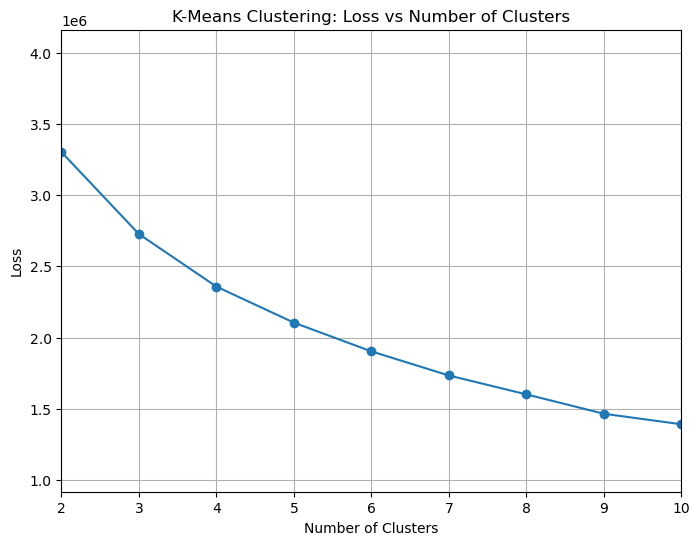

In [13]:

plt.figure(figsize=(8,6))
plt.plot(clusters_range, loss_values,marker = 'o')
plt.ylabel("Loss")
plt.xlabel("Number of Clusters")
plt.title("K-Means Clustering: Loss vs Number of Clusters")
plt.grid(True)
plt.xlim([2,10])
plt.show()


To determine the optimal value for the number of clusters we will use the elbow method. In this case you can see that it falls quickly and then slows down. So it should be something between 3-6.


In [14]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans.fit(rental_trips_data_scaled)


numbers = ['zero', 'one', 'two', 'three']
rental_trips_data_scaled['cluster'] = kmeans.predict(rental_trips_data_scaled)
rental_trips_data_scaled['cluster'] = rental_trips_data_scaled['cluster'].apply(lambda x: numbers[x])


In [15]:
rental_trips_data_scaled.head(10)

,month,weekday,user_type,trip_length,hour_sin,hour_cos,cluster
0,-2.000679,-1.460252,-0.515006,-0.040773,0.333907,2.348044,zero
1,-2.000679,-1.460252,0.235390,6.878013,0.333907,2.348044,zero
2,-2.000679,-1.460252,-0.515006,0.009182,0.333907,2.348044,zero
3,-2.000679,-1.460252,-0.515006,-0.003306,0.688352,2.286968,zero
4,-2.000679,-1.460252,-0.515006,-0.215616,0.688352,2.286968,zero
5,-2.000679,-1.460252,-0.515006,7.952048,0.688352,2.286968,three
6,-2.000679,-1.460252,1.736182,-0.115705,0.688352,2.286968,one
7,-2.000679,-1.460252,0.235390,-0.178149,0.688352,2.286968,zero
8,-2.000679,-1.460252,-0.515006,-0.203127,1.018643,2.107905,zero
9,-2.000679,-1.460252,-0.515006,-0.015795,1.018643,2.107905,zero


After letting Kmeans cluster the data we need to merge the unscaled features.


In [16]:
final_merge= rental_trips_data_scaled.copy()

final_merge['month'] = rental_trips_data['month']
final_merge['weekday'] = rental_trips_data['weekday']
final_merge['hour'] = rental_trips_data['hour']
final_merge['user_type'] = rental_trips_data['user_type']
final_merge['trip_length'] = rental_trips_data['trip_length']

final_merge['user_type_unscaled_temp'] = rental_trips_data['user_type']

#Converting the copy into a numeric column
final_merge['user_type_unscaled_temp'] = final_merge['user_type_unscaled_temp'].apply(pd.to_numeric)

#Overwriting the original column with the converted one
final_merge['user_type_unscaled'] = final_merge['user_type_unscaled_temp']

#Deleting temp column
final_merge.drop(columns=['user_type_unscaled_temp'], inplace=True)

Because of the large amount of data, the violin plot was chosen to demonstrate the distribution of the given data set. 

Text(0.5, 1.0, 'User Type')

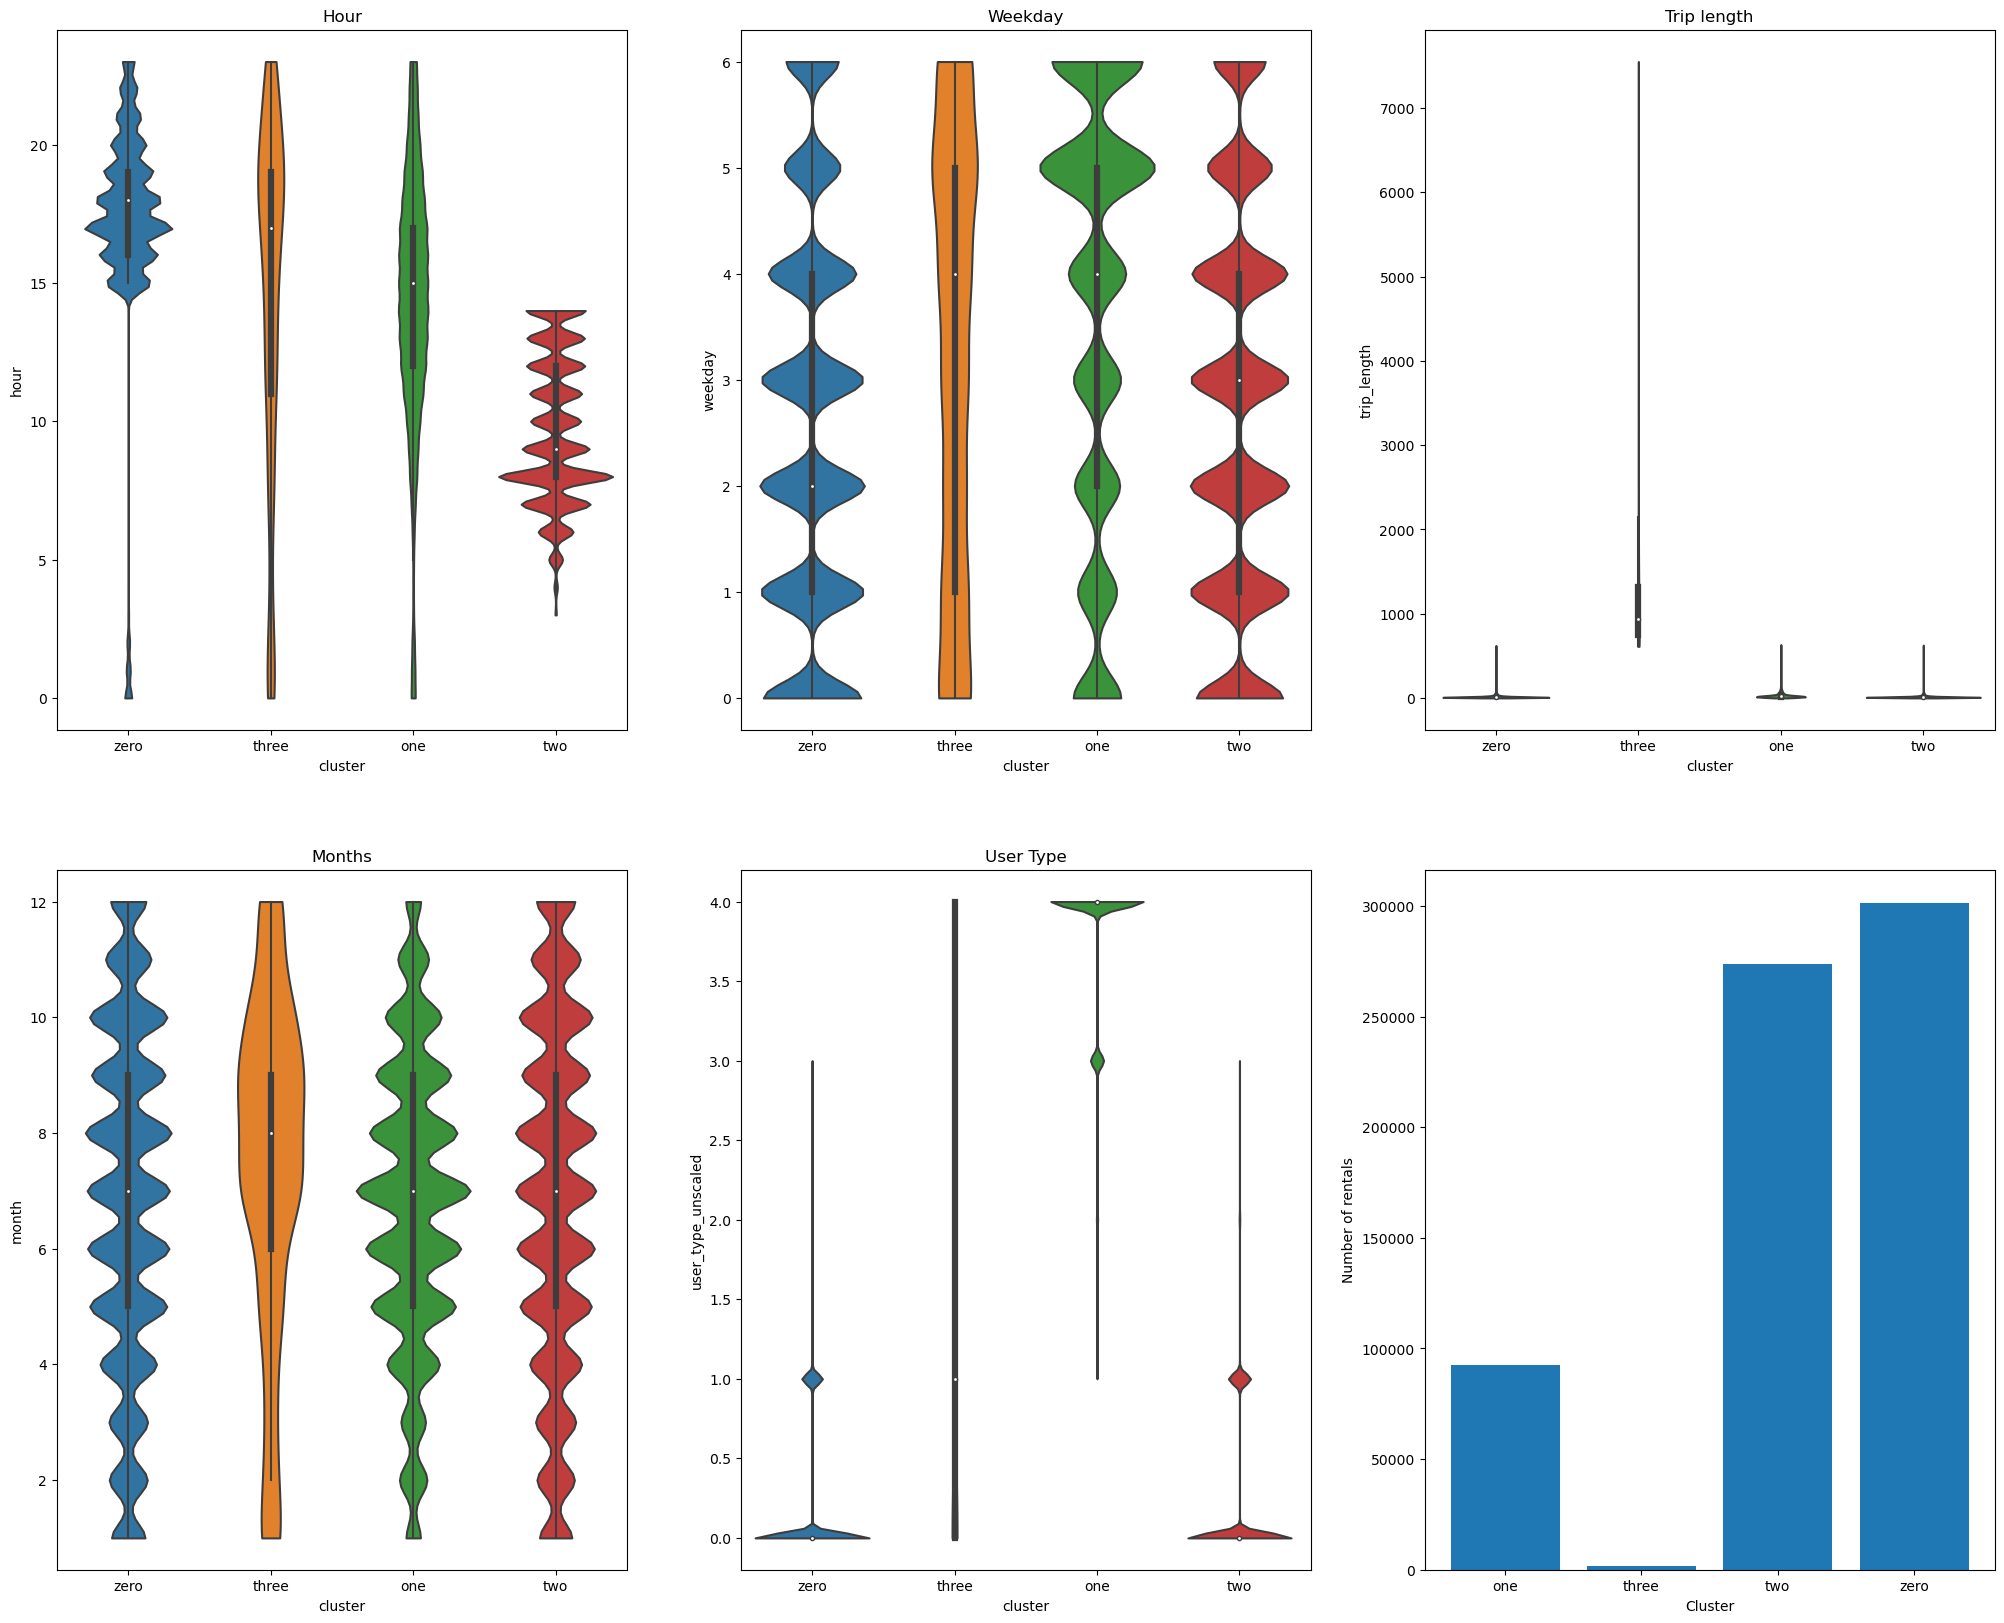

In [17]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,20))
cluster_size = final_merge.groupby(['cluster'])['cluster'].agg('count')
axes[1, 2].bar(cluster_size.index, cluster_size)
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Number of rentals')

sns.violinplot(x=final_merge['cluster'], y=final_merge['hour'], data=final_merge, ax=axes[0,0],cut=0)
axes[0,0].set_title('Hour')

sns.violinplot(x=final_merge['cluster'], y=final_merge['weekday'], data=final_merge, ax=axes[0,1],cut=0)
axes[0,1].set_title('Weekday')

sns.violinplot(x=final_merge['cluster'], y=final_merge['trip_length'], data=final_merge, ax=axes[0,2],cut=0)
axes[0,2].set_title('Trip length')
#to verify the statements below set y-axis right.
#axes[0,2].set_ylim(0,50)


sns.violinplot(x=final_merge['cluster'], y=final_merge['month'], data=final_merge, ax=axes[1,0],cut=0)
axes[1,0].set_title('Months')


sns.violinplot(x=final_merge['cluster'], y=final_merge['user_type_unscaled'], data=final_merge, ax=axes[1,1],cut=0)
axes[1,1].set_title('User Type')



Cluster Zero: Here we find the largest number of bike rentals, with around 300,000 rentals. These were used for short to medium duration trips (8-10 minutes) and most subscribers owned the Indego30 Subscription. There is an even distribution for the days during the week/working days. Values that include weekdays 5 and 6 or Saturday and Sunday are poorly represented in this cluster. It is noticeable that trips that take place in the evening are included in this cluster. The time 5 p.m. is particularly prominent. The median is 6 p.m., which shows that there are many values that form the evening hours cluster. These persons likely use bicycles as a form of transportation after work. It is not possible to make a clear statement about when the most bicycles were borrowed. However, there is a tendency for consumers belonging to cluster 1 (Indego30 and Idego365) to use the bike rental service less in the winter months.

Cluster One: Here are 100,000 rentals, most of them were rented between 12:00h and 17:00h, with a peak at 15:00h. The bikes were used for medium duration trips (20 minutes). Cluster one is interesting in that the Walk-up and Day Pass customer subscriptions play a dominant role here. Thus, for example, it can be interpreted that cluster one includes users who spontaneously travel longer distances. The peak on Saturday supports this thesis that on this day, leisure activities are undertaken and the fun of cycling is the priority. On weekends, users may have more time to complete their rides. The picture is completed when looking at the times when the bicycles are rented. This is namely unspecifically distributed over the whole day, but always in such a way that it is possible to sleep in (starting time around 9 a.m.). The cluster dimension month reinforces the impression, since the main rides take place in summer. July is the month with the most intensive use of bicycles.

Cluster Two: This is the second largest cluster with just under 275,000 rentals. It is very similar to cluster zero in relation to the dimensions weekday, month, user type and trip length. It differs in the dimension of hour. People rent bikes the most between 8:00 am and 12:00 pm, with a peak at 9:00 am. These people who rent the bike after work are likely the same people who use it for the way to work.

Cluster Three: Cluster three looks on the outliers. In this case, bikes were rented between 11:00 am and 7:00 pm, with a peak at 5:00 pm. Most rentals were on Staurdays, between June and September, with a peak in August. Trip length is the longest here, due to the overall low number of rentals. Most rentals in this cluster were rented with an Indego365 subscription. In case that in this cluster, there are just few data, it is not easy to make any assumptions, because it really just looks like having too few data.




# Clustering stations

In this section rental stations will be clustered and evaluated.
In the first step, we have to load the data from the stations.csv.

In [18]:
#load datasets and dropping unnecessary columns
station_df= pd.read_csv('data_prepared/stations.csv')
station_df.drop(['zipcode', 'go_live_date', 'approximate_location'], axis=1, inplace=True)
station_df.head()

,station_id,station_name,latitude,longitude
0,3000,Virtual Station,NaN,NaN
1,3004,Municipal Services Building Plaza,39.95378,-75.16374
2,3005,"Welcome Park, NPS",39.94733,-75.14403
3,3006,40th & Spruce,39.95220,-75.20311
4,3007,"11th & Pine, Kahn Park",39.94517,-75.15993


Copy the rental_trips_df Dataframe to ensure, that data will not confuse other use of the Dataframe.

In [19]:
rental_station_df = rental_trips_df.copy()
rental_station_df.head(2)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,trip_length,is_roundtrip,start_time_hourly,hour,weekday,weekday_name,month,month_name,season,is_weekend,is_holiday,is_subscription,dist,kmh
0,2018-01-01 00:24:00,2018-01-01 00:42:00,3124,3073,3708,Indego30,18,False,2018-01-01 00:00:00,0,0,Monday,1,January,Winter,False,True,True,1.396371,4.654571
1,2018-01-01 00:38:00,2018-01-01 10:10:00,3023,3066,3288,Indego365,572,False,2018-01-01 00:00:00,0,0,Monday,1,January,Winter,False,True,True,0.384103,0.040291


In [20]:
# Merging the data frames
merged_df = rental_station_df.merge(station_df, left_on='start_station_id', right_on='station_id', suffixes=('_start', '_end'))
merged_df = merged_df.merge(station_df, left_on='end_station_id', right_on='station_id')

# Renaming columns
merged_df = merged_df.rename(columns={
    'station_name_x': 'start_station_name',
    'latitude_x': 'start_station_latitude',
    'longitude_x': 'start_station_longitude',
    'station_name_y': 'end_station_name',
    'latitude_y': 'end_station_latitude',
    'longitude_y': 'end_station_longitude'
})

#Keeping only the desired columns
merged_df = merged_df[['start_time','end_time','season','month','weekday','hour','is_weekend','is_holiday','user_type','bike_id','start_station_id','start_station_name','start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']]
merged_df.head()




,start_time,end_time,season,month,weekday,hour,is_weekend,is_holiday,user_type,bike_id,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,2018-01-01 00:24:00,2018-01-01 00:42:00,Winter,1,0,0,False,True,Indego30,3708,3124,Race Street Pier,39.95367,-75.13956,3073,9th & Spring Garden,39.96143,-75.15242
1,2018-01-22 17:10:00,2018-01-22 17:30:00,Winter,1,0,17,False,False,Indego30,170,3124,Race Street Pier,39.95367,-75.13956,3073,9th & Spring Garden,39.96143,-75.15242
2,2018-04-13 15:09:00,2018-04-13 15:22:00,Spring,4,4,15,False,False,Indego30,3402,3124,Race Street Pier,39.95367,-75.13956,3073,9th & Spring Garden,39.96143,-75.15242
3,2018-05-17 23:36:00,2018-05-18 00:30:00,Spring,5,3,23,False,False,Indego30,11016,3124,Race Street Pier,39.95367,-75.13956,3073,9th & Spring Garden,39.96143,-75.15242
4,2018-06-08 23:20:00,2018-06-08 23:33:00,Summer,6,4,23,False,False,Indego30,2577,3124,Race Street Pier,39.95367,-75.13956,3073,9th & Spring Garden,39.96143,-75.15242


In [21]:
#Counting the hourly demand of each start_station_id
grouped_df = merged_df.groupby(['hour', 'start_station_id']).size().reset_index(name='counts')
station_count = grouped_df.pivot(index='hour', columns='start_station_id', values='counts')
station_count = station_count.fillna(0)


station_count

start_station_id,3000,3004,3005,3006,3007,3008,3009,3010,3011,3012,...,3181,3182,3183,3184,3185,3186,3187,3188,3190,3192
hour,,,,,,,,,,,,,,,,,,,,,
0,1.0,64.0,85.0,61.0,96.0,16.0,85.0,225.0,46.0,37.0,...,0.0,4.0,0.0,0.0,9.0,0.0,7.0,32.0,34.0,7.0
1,1.0,42.0,32.0,39.0,61.0,2.0,72.0,149.0,16.0,23.0,...,2.0,4.0,0.0,0.0,11.0,0.0,1.0,15.0,37.0,7.0
2,0.0,47.0,24.0,25.0,40.0,2.0,42.0,124.0,15.0,9.0,...,0.0,5.0,0.0,0.0,5.0,0.0,5.0,8.0,20.0,4.0
3,0.0,13.0,8.0,11.0,19.0,3.0,10.0,19.0,6.0,17.0,...,2.0,0.0,0.0,0.0,6.0,0.0,0.0,20.0,2.0,1.0
4,0.0,6.0,4.0,13.0,10.0,2.0,13.0,15.0,8.0,27.0,...,0.0,7.0,0.0,0.0,2.0,1.0,1.0,14.0,3.0,0.0
5,0.0,17.0,21.0,43.0,152.0,6.0,9.0,151.0,22.0,263.0,...,1.0,10.0,0.0,0.0,3.0,0.0,3.0,13.0,42.0,1.0
6,2.0,26.0,51.0,118.0,438.0,22.0,71.0,340.0,78.0,835.0,...,0.0,13.0,1.0,0.0,21.0,0.0,3.0,9.0,54.0,31.0
7,4.0,60.0,165.0,135.0,613.0,60.0,103.0,449.0,139.0,1649.0,...,2.0,11.0,3.0,0.0,7.0,2.0,16.0,25.0,78.0,38.0
8,6.0,104.0,113.0,289.0,1002.0,115.0,267.0,1302.0,254.0,1562.0,...,6.0,28.0,12.0,0.0,15.0,4.0,33.0,64.0,184.0,106.0


In [22]:
# scaling
scaler = StandardScaler()
scaler.fit(station_count)

station_count_scaled = scaler.transform(station_count)
station_count_scaled = pd.DataFrame(station_count_scaled, columns = station_count.columns, index = station_count.index)

station_count_scaled.head()

start_station_id,3000,3004,3005,3006,3007,3008,3009,3010,3011,3012,...,3181,3182,3183,3184,3185,3186,3187,3188,3190,3192
hour,,,,,,,,,,,,,,,,,,,,,
0,-0.449448,-0.729579,-0.631643,-1.066140,-1.204723,-0.994851,-0.861923,-0.900966,-1.016372,-1.039645,...,-0.771135,-1.010743,-0.855751,-0.57348,-0.843180,-0.858084,-0.841960,-0.165247,-1.049599,-1.232014
1,-0.449448,-0.797928,-1.007438,-1.273555,-1.335756,-1.152898,-0.905053,-1.036646,-1.422696,-1.072411,...,-0.677664,-1.010743,-0.855751,-0.57348,-0.791623,-0.858084,-1.047107,-0.789512,-1.020056,-1.232014
2,-0.939755,-0.782394,-1.064162,-1.405546,-1.414376,-1.152898,-1.004586,-1.081278,-1.436240,-1.105177,...,-0.771135,-0.989142,-0.855751,-0.57348,-0.946295,-0.858084,-0.910342,-1.046562,-1.187466,-1.310100
3,-0.939755,-0.888025,-1.177610,-1.537536,-1.492995,-1.141609,-1.110754,-1.268731,-1.558137,-1.086454,...,-0.677664,-1.097147,-0.855751,-0.57348,-0.920517,-0.858084,-1.081299,-0.605904,-1.364724,-1.388185
4,-0.939755,-0.909773,-1.205972,-1.518681,-1.526690,-1.152898,-1.100800,-1.275872,-1.531048,-1.063049,...,-0.771135,-0.945940,-0.855751,-0.57348,-1.023632,-0.733272,-1.047107,-0.826233,-1.354877,-1.414214


C:\Users\wayne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


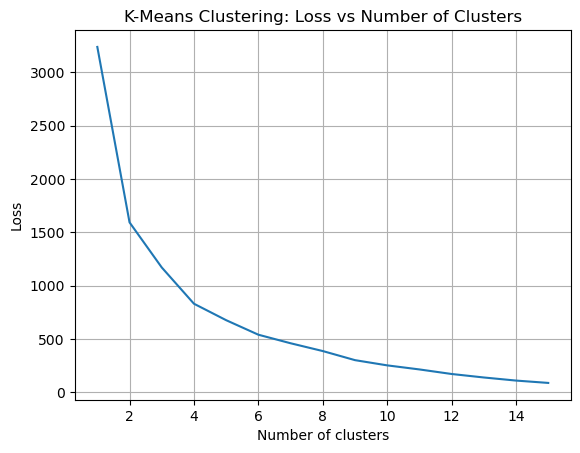

In [23]:
max_clusters = 15

clusters_range = []
loss_values = []


for num_clusters in range(1, max_clusters + 1):
    k_means_model = KMeans(n_clusters = num_clusters)
    k_means_model.fit(station_count_scaled)
    
    clusters_range.append(num_clusters)
    loss_values.append(k_means_model.inertia_)
    

plt.plot(clusters_range, loss_values)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.title("K-Means Clustering: Loss vs Number of Clusters")
plt.grid(True)
plt.show()

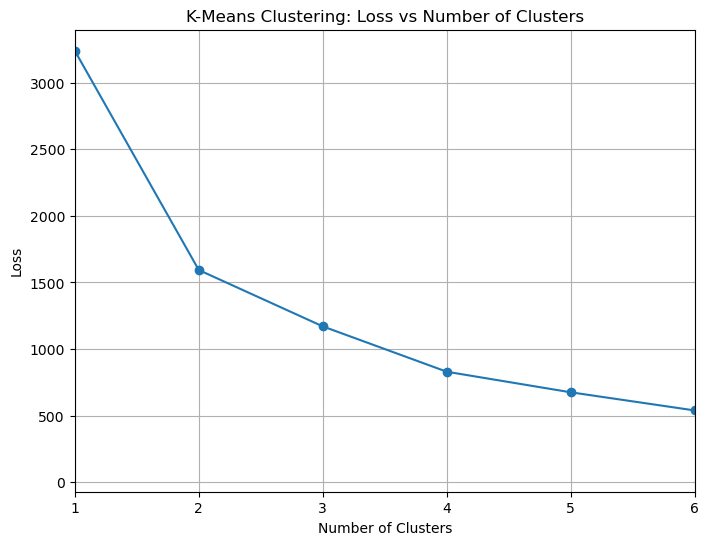

In [24]:
#Zooming
plt.figure(figsize=(8,6))
plt.plot(clusters_range, loss_values,marker = 'o')
plt.ylabel("Loss")
plt.xlabel("Number of Clusters")
plt.title("K-Means Clustering: Loss vs Number of Clusters")
plt.grid(True)
plt.xlim([1,6])
plt.show()


Here we are using the "elbow" method again. By drawing a straight line, you can see that 2-4 is suitable for this case.

In [25]:
mtx = station_count_scaled.T
arr = mtx.to_numpy()
km_model = KMeans(n_clusters=3, random_state=0).fit(arr)
mtx['cluster']=km_model.predict(mtx)

grouped_data = mtx.T
grouped_data.tail()


start_station_id,3000,3004,3005,3006,3007,3008,3009,3010,3011,3012,...,3181,3182,3183,3184,3185,3186,3187,3188,3190,3192
hour,,,,,,,,,,,,,,,,,,,,,
20,-0.449448,0.180712,0.226304,0.630885,0.202945,0.145347,0.551437,0.164840,0.229685,-0.253256,...,-0.163574,1.041344,-0.531039,-0.332015,0.316864,-0.483647,-0.192326,-0.312132,0.693441,0.485865
21,2.982699,-0.123754,0.502833,0.225484,-0.332418,-0.238482,0.116812,0.018448,-0.271446,-0.522407,...,-0.630928,0.026101,-0.855751,-0.332015,0.110634,-0.858084,0.012822,-0.018361,-0.350413,-0.034705
22,0.531166,-0.474822,0.524104,-0.179916,-0.699310,-0.531998,-0.360943,-0.310042,-0.393343,-0.807941,...,-0.771135,-0.362715,-0.855751,-0.573480,-0.172933,-0.858084,-0.397473,0.936397,-0.143612,-0.711445
23,-0.939755,-0.645695,-0.121129,-0.792731,-0.957632,-0.238482,-0.596503,-0.622464,-0.826755,-0.917942,...,-0.584193,-0.924339,-0.855751,-0.573480,-0.430720,-0.858084,-0.841960,2.368535,-0.724625,-0.893644
cluster,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [26]:
cluster_labels = [0.000000, 1.000000, 2.000000]
clusters = [grouped_data[grouped_data.columns[grouped_data.iloc[-1]==cluster]].copy() for cluster in cluster_labels]
for cluster in clusters:
    cluster.loc[:, 'average'] = cluster.mean(numeric_only=True, axis=1)
    cluster.drop(['cluster'], inplace=True)
trips_station_normal_arr_cluster0, trips_station_normal_arr_cluster1, trips_station_normal_arr_cluster2 = clusters

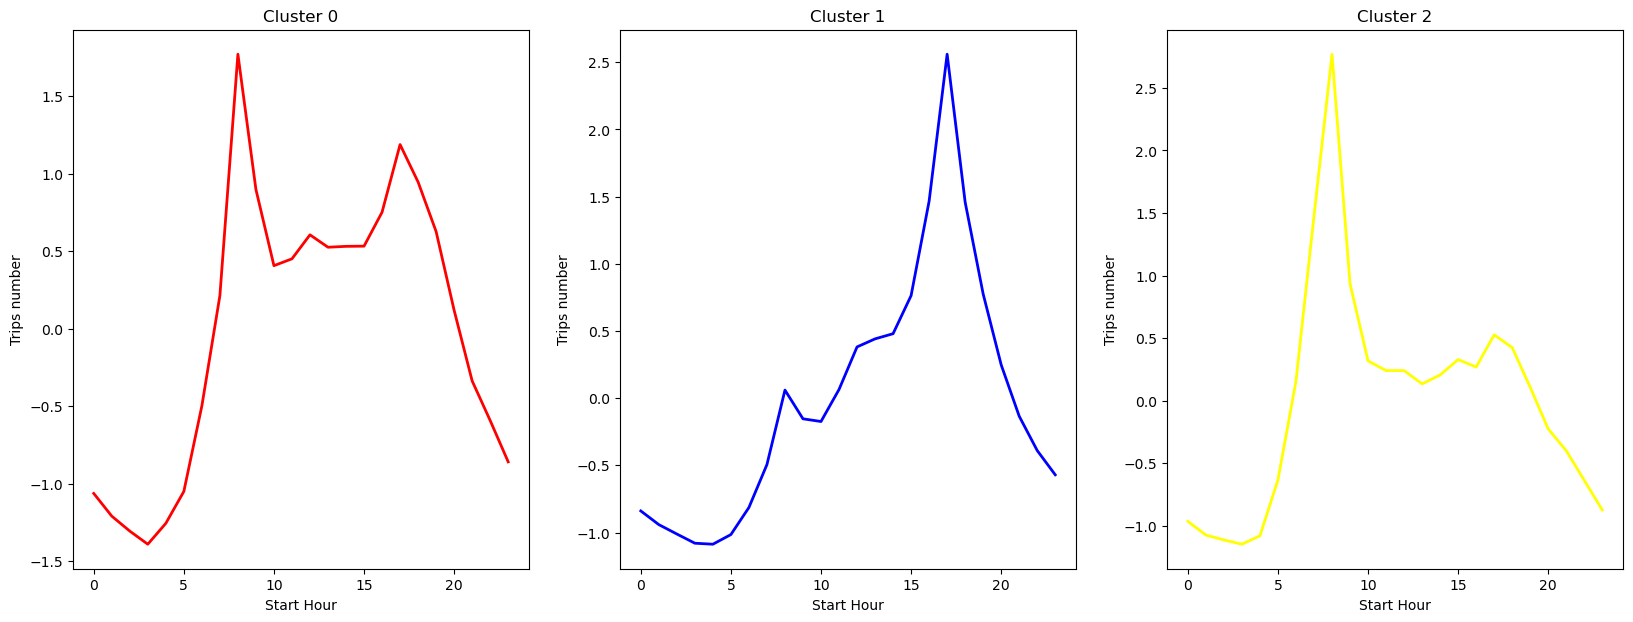

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,7))

clusters = [trips_station_normal_arr_cluster0, trips_station_normal_arr_cluster1, trips_station_normal_arr_cluster2]
titles = ['Cluster 0', 'Cluster 1', 'Cluster 2']
colors = ['red', 'blue', 'yellow']

for i, cluster in enumerate(clusters):
    ax[i].plot(cluster["average"], color=colors[i], linewidth=2)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Start Hour')
    ax[i].set_ylabel('Trips number')

plt.show()

Cluster Zero: Here is a mixed area where there is a high demand at eight and 18. It can be seen that there is a high variation, because the scale goes from -1.5 to 2.0 as the other graphics uses an y Axes from -1 to 3.0. This cluster can show the rest of data which is not clearly defined by the two pattern already seen in the descriptive analysis, where there is a high recommendation of rentals at 7/8 and 17/18.
Mixed Area --> Peak at 8 and 17/18h

Cluster One: In cluster one there is a peak at 18 o'clock. This can be the referred working area. People coming home from work and use the bike to ride at home with it. In cause there is a high variance of data it is not possible/ purposeful that the cluster has pure data of 18 o'clock, because then there would be an overengineering. In conclusion, there are also be seen data around 0 on the y-axes where there is not a high trips number correlation with that cluster. 
Work Area --> Peak 18h

Cluster Two: In cluster two a peak at 8 o'clock can be seen. It could be maybe the residential area, where people leave their homes to ride to work. Like in cluster one there are also trips around the peak.
Living Area --> Peak 8h

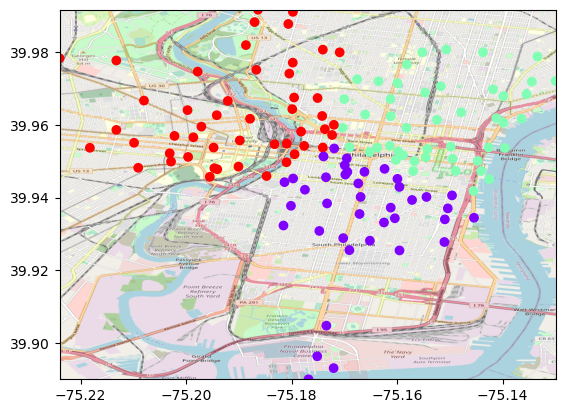

In [28]:

station_count_T = station_count.T

#Setting the first row index as the column name
station_count_T.columns = station_count_T.iloc[0]

#Deleting the fist row
station_count_T = station_count_T.iloc[1:]

#Comining both datasets on station_id
df = pd.merge(station_df, station_count_T, left_on='station_id', right_index=True)

#Applying latitude and longitute to the cluster
coordinates = df[['latitude', 'longitude']]

#Again clustering with K=3
kmeans = KMeans(n_clusters=3)

kmeans.fit(coordinates)

#Adding the predictions of the algorithm as a column to the datasets
df['cluster'] = kmeans.predict(coordinates)

BBox = ((df.longitude.min(),
df.longitude.max(),
df.latitude.min(),
df.latitude.max()))

plt.imshow(plt.imread('images/philadelphia_osm.png'), zorder=0, extent=BBox, aspect='auto')

plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='rainbow', zorder=1)

plt.show()

#top right cluster=working area
#bottom cluster=residential area
#left cluster=mixed area


The map shows the three clusters. On the right side above is the working area. Below is the residential area. On the left you can see the mixed area.

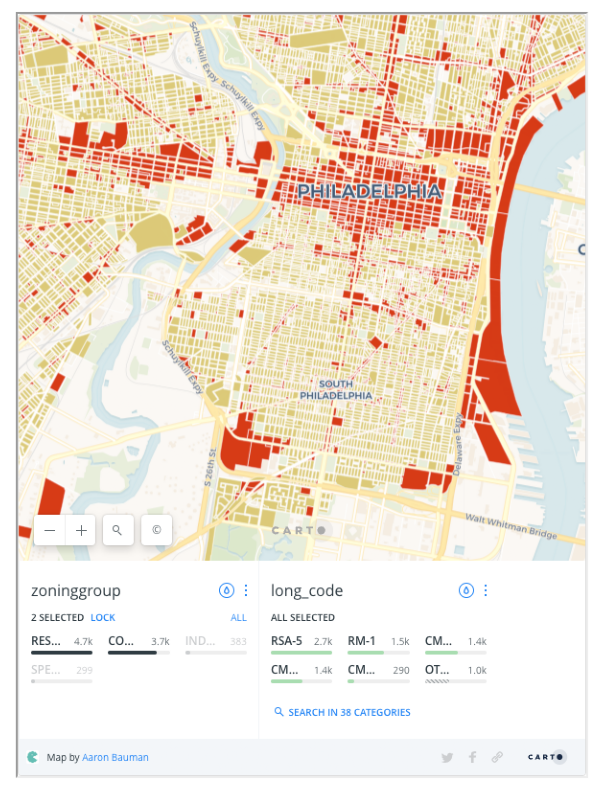

In [29]:
#importing a screenshot from https://www.5thsq.org/map_philadelphia_zoning_districts,
#which demonstrates residential areas (yellow) and commercial areas (red) 
img = imread('images/philadelphia zoning.png')
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

A closer look at the clusters using the zoning map of Philidadelphia, confirmed or reinforced the assumption that they are residential areas, working areas and mixed areas. 
